In [1]:
import numpy as np

import os

import matplotlib.pyplot as plt


In [8]:
from scipy.io import loadmat
cluster_fn = os.path.join('/user_data/mmhender/toolboxes/SketchTokens/', 'clusters.mat')
clust = loadmat(cluster_fn)
feature_ims = clust['clusters']['clusters'][0][0]


In [49]:
from analyze_features import analyze_im_curvature
freq_values_cyc_per_pix = [0.5, 0.25, 0.125, 0.0625, 0.03125]
bend_values = [0, 0.04, 0.08, 0.16, 0.32, 0.64]
orient_values = np.linspace(0,np.pi*2, 9)[0:8]
cropped_size=100
device='cpu:0'
freq_values_cyc_per_image = np.array(freq_values_cyc_per_pix)*cropped_size
bank = analyze_im_curvature.bent_gabor_feature_bank(freq_values = freq_values_cyc_per_image, \
                                       bend_values = bend_values, \
                                       orient_values = orient_values, \
                                       image_size=cropped_size, \
                                       device = device)

initialized feature bank, device is: cpu:0
freq values
[50.    25.    12.5    6.25   3.125]
scale values
[ 2.  4.  6.  8. 10.]
bend values
[0, 0.04, 0.08, 0.16, 0.32, 0.64]
orient values
[0.         0.78539816 1.57079633 2.35619449 3.14159265 3.92699082
 4.71238898 5.49778714]


In [53]:
n_curv_kernels = bank.curv_kernel_pars.shape[0]
n_rect_kernels = bank.rect_kernel_pars.shape[0]
n_lin_kernels = bank.lin_kernel_pars.shape[0]

In [55]:
n_lin_kernels

40

In [3]:
from utils import default_paths
fn2save = os.path.join(default_paths.sketch_token_feat_path, 'Sketch_token_feature_curvrect_stats.npy')

In [4]:
fn = '/user_data/mmhender/features/sketch_tokens/Sketch_token_feature_curvrect_stats.npy'

stats = np.load(fn, allow_pickle=True).item()



In [31]:
import scipy.stats

In [5]:
stats.keys()

dict_keys(['curv_score_method1', 'lin_score_method1', 'curv_score_method2', 'rect_score_method2', 'lin_score_method2', 'mean_curv', 'mean_rect', 'mean_lin', 'mean_curv_z', 'mean_rect_z', 'mean_lin_z', 'max_curv', 'max_rect', 'max_lin', 'max_curv_z', 'max_rect_z', 'max_lin_z', 'best_curv_kernel', 'best_rect_kernel', 'best_lin_kernel', 'best_curv_kernel_z', 'best_rect_kernel_z', 'best_lin_kernel_z'])

In [34]:
top_n_images, n_prfs_use, n_features = stats['best_curv_kernel'].shape

In [95]:
kernel_inds = np.reshape(stats['best_curv_kernel_z'],[top_n_images*n_prfs_use,n_features], order='F')
ff=0
neach = np.array([[np.sum(kernel_inds[:,ff]==ki) for ki in range(n_curv_kernels)] \
                  for ff in range(n_features)])


In [96]:
np.argmax(neach, axis=1)

array([33, 35, 33, 35, 37, 37, 37, 33, 35, 35, 33, 37, 39, 33, 39, 35, 39,
       33, 33, 39, 39, 37, 33, 39, 33, 35, 33, 35, 33, 39, 35, 39, 33, 35,
       35, 37, 33, 37, 33, 33, 37, 39, 35, 33, 33, 39, 39, 39, 33, 33, 35,
       37, 37, 37, 35, 39, 33, 37, 35, 35, 33, 37, 35, 33, 35, 37, 33, 37,
       39, 33, 37, 37, 39, 33, 33, 35, 39, 37, 35, 35, 35, 39, 39, 33, 33,
       39, 35, 35, 33, 33, 39, 33, 39, 33, 37, 33, 37, 33, 33, 35, 39, 35,
       33, 37, 33, 37, 33, 39, 37, 39, 33, 37, 33, 33, 39, 33, 37, 39, 35,
       33, 35, 37, 33, 33, 33, 39, 37, 33, 39, 39, 39, 35, 35, 33, 35, 39,
       39, 37, 39, 37, 35, 39, 39, 33, 33, 37, 35, 39, 35, 35])

In [100]:
kernel_inds = np.reshape(stats['best_lin_kernel'],[top_n_images*n_prfs_use,n_features], order='F')
ff=0
neach = np.array([[np.sum(kernel_inds[:,ff]==ki) for ki in range(n_lin_kernels)] \
                  for ff in range(n_features)])


In [101]:
np.argmax(neach, axis=1)

array([32, 34, 32, 32, 34, 32, 32, 34, 33, 34, 34, 35, 32, 34, 34, 34, 32,
       32, 34, 32, 32, 32, 34, 33, 35, 34, 34, 32, 35, 33, 32, 32, 34, 32,
       32, 34, 34, 34, 32, 32, 34, 34, 33, 34, 32, 32, 32, 34, 32, 34, 34,
       34, 32, 34, 32, 34, 34, 32, 33, 34, 34, 34, 32, 34, 32, 32, 32, 34,
       34, 34, 32, 32, 32, 32, 34, 32, 34, 32, 32, 34, 32, 32, 32, 32, 32,
       32, 32, 34, 32, 32, 34, 32, 34, 32, 32, 34, 32, 32, 32, 34, 32, 34,
       32, 34, 34, 35, 32, 34, 34, 34, 34, 32, 32, 34, 32, 32, 32, 34, 34,
       34, 34, 34, 34, 34, 32, 34, 32, 34, 32, 33, 34, 34, 32, 32, 32, 32,
       34, 32, 32, 35, 34, 32, 32, 32, 34, 34, 32, 32, 32, 32])

In [86]:
kernel_inds = stats['best_curv_kernel']
neach = np.array([[[np.sum(kernel_inds[:,prf,ff]==ki) for ki in range(n_curv_kernels)] \
                  for ff in range(n_features)] for prf in range(n_prfs_use)])


In [94]:
prf=50;
np.argmax(neach[prf,:,:], axis=1)

array([ 35,  35,  33,  35,  33,  39,  39,  37,  33,  33,  33,  33,  33,
        33,  33,  39,  39, 184,  33,  33,  39,  37,  33,  33,  33, 172,
        33, 184,  33,  33,  39,  39,  37, 184,  37,  33,  39,  37,   0,
        33, 186,  33,  35,  35,  33,  33,  39,  33,  33,  33,  35, 186,
       163,  33, 161,  37, 172, 188,  33, 186, 186,  35,  37,  35,  35,
        33,  33,  37, 190, 186,  37,  35,  39,  33,  35,  37,  33,  35,
       184,   6,  35,  39,  39,  33,  37,  33,  35,  39, 184,  33,  35,
        33,  39,  33, 196,  33, 184,  33,  35,  35,  33,  39, 192,  33,
        35,  39,  35,  33, 190,  39, 190,  35,  35,  33,  37,  35, 161,
       167,  33,  37, 161, 161,  33,  33,  33,  33, 161,  33,  39,  33,
        37,  35,  35,  39,  35,  33,  35,  35,  35,  33,  37,  33,  39,
        37,  35,  33,  39,  37,  35,  35])

In [83]:
neach.shape

(150, 200)

In [80]:
unique, counts = np.unique(kernel_inds, axis=1, return_counts=True)

In [81]:
counts.shape

(150,)

In [77]:
kernel_inds.shape

(9216, 150)

In [75]:
mode, mode_counts = scipy.stats.mode(kernel_inds, axis=0)

In [76]:
mode_counts.shape

(1, 150)

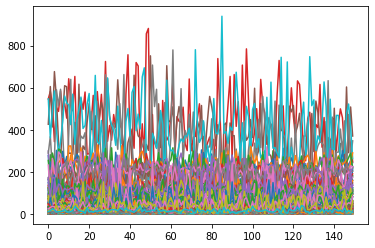

In [84]:
plt.figure();
plt.plot(neach);

In [60]:
np.argmax(neach)

33

In [67]:
mode

array([[33., 35., 33., 35., 37., 37., 37., 33., 35., 35., 33., 37., 39.,
        33., 39., 35., 39., 33., 33., 39., 39., 37., 33., 39., 33., 35.,
        33., 35., 33., 39., 35., 39., 33., 35., 35., 37., 33., 37., 33.,
        33., 37., 39., 35., 33., 33., 39., 39., 39., 33., 33., 35., 37.,
        37., 37., 35., 39., 33., 37., 35., 35., 33., 37., 35., 33., 35.,
        37., 33., 37., 39., 33., 37., 37., 39., 33., 33., 35., 39., 37.,
        35., 35., 35., 39., 39., 33., 33., 39., 35., 35., 33., 33., 39.,
        33., 39., 33., 37., 33., 37., 33., 33., 35., 39., 35., 33., 37.,
        33., 37., 33., 39., 37., 39., 33., 37., 33., 33., 39., 33., 37.,
        39., 35., 33., 35., 37., 33., 33., 33., 39., 37., 33., 39., 39.,
        39., 35., 35., 33., 35., 39., 39., 37., 39., 37., 35., 39., 39.,
        33., 33., 37., 35., 39., 35., 35.]])

In [70]:
bank.curv_kernel_pars[np.unique(mode).astype(int),:]

array([[3.14159265, 0.64      , 0.78539816, 1.        ],
       [3.14159265, 0.64      , 2.35619449, 1.        ],
       [3.14159265, 0.64      , 3.92699082, 1.        ],
       [3.14159265, 0.64      , 5.49778714, 1.        ]])

In [13]:
np.sum(stats['mean_rect_z']==0)

0

In [6]:
c_mean = np.mean(np.mean(stats['mean_curv_z'], axis=0), axis=0)
r_mean = np.mean(np.mean(stats['mean_rect_z'], axis=0), axis=0)
l_mean = np.mean(np.mean(stats['mean_lin_z'], axis=0), axis=0)
c_score = (c_mean-r_mean-l_mean)/((c_mean+r_mean+l_mean))

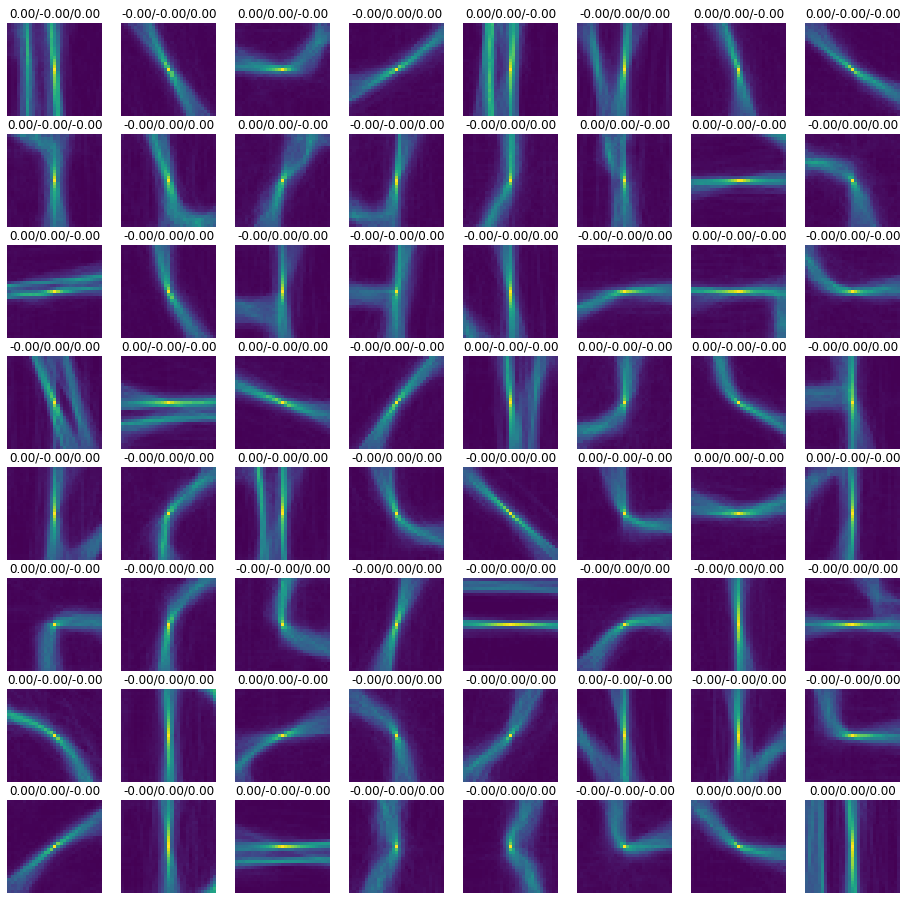

In [14]:
# plot_order = np.flip(np.argsort(c_score))
plot_order = np.argsort(c_score)
n2plot = 64;
npx=8;npy=8;
plt.figure(figsize=(16,16));
for fi, ff in enumerate(plot_order[0:n2plot]):
    plt.subplot(npx,npy,fi+1)
    plt.pcolormesh(feature_ims[:,:,ff].T)
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.title('%.2f/%.2f/%.2f'%(c_mean[ff], r_mean[ff], l_mean[ff]))

In [118]:
c_means1 = np.mean(np.mean(stats['curv_score_method1'], axis=0), axis=0)
l_means1 = np.mean(np.mean(stats['lin_score_method1'], axis=0), axis=0)

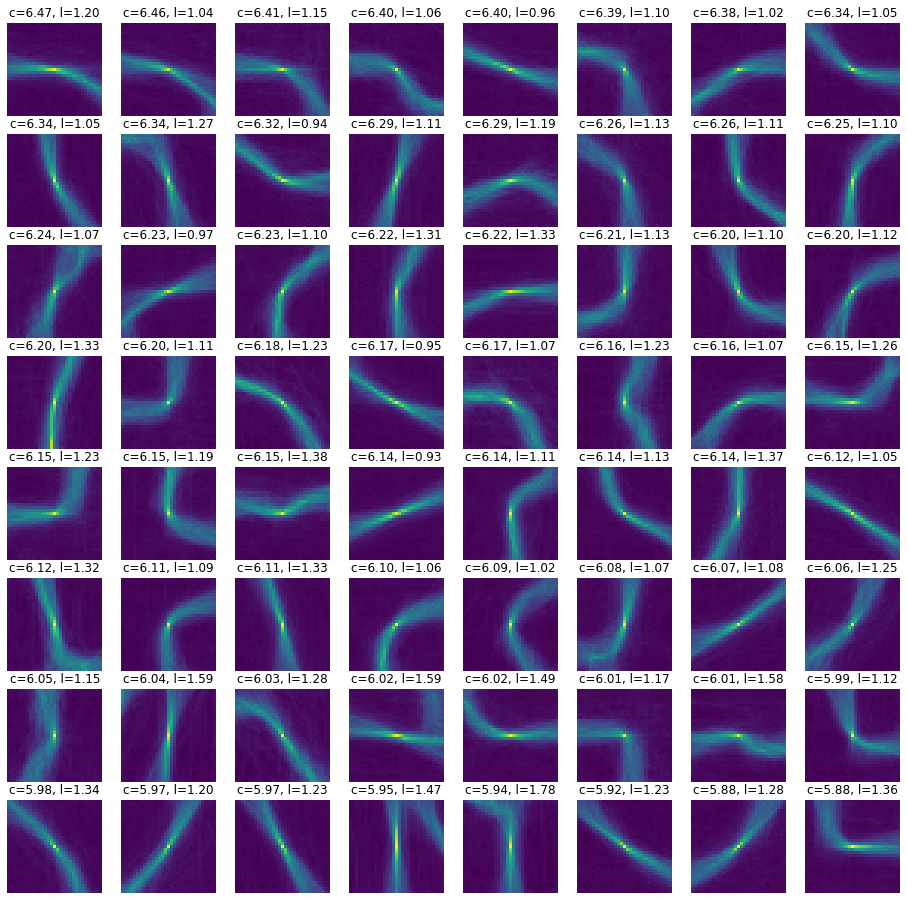

In [120]:
plot_order = np.flip(np.argsort(c_means1))
n2plot = 64;
npx=8;npy=8;
plt.figure(figsize=(16,16));
for fi, ff in enumerate(plot_order[0:n2plot]):
    plt.subplot(npx,npy,fi+1)
    plt.pcolormesh(feature_ims[:,:,ff].T)
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.title('c=%.2f, l=%.2f'%(c_means1[ff], l_means1[ff]))

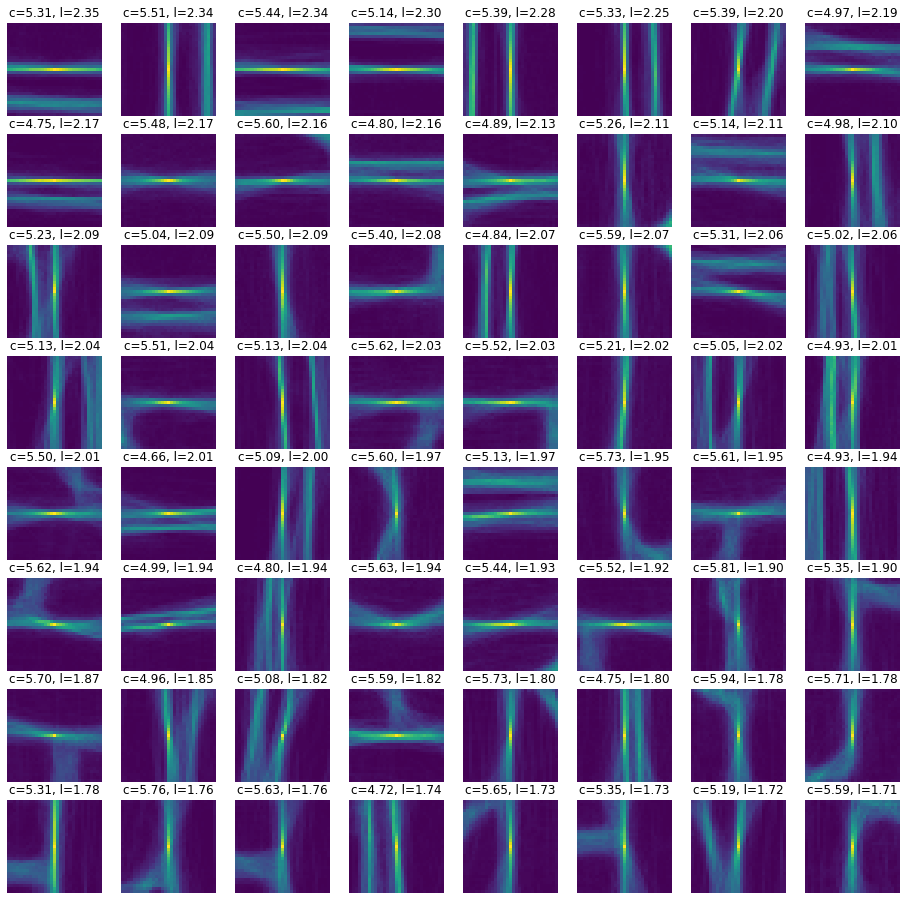

In [121]:
plot_order = np.flip(np.argsort(l_means1))
n2plot = 64;
npx=8;npy=8;
plt.figure(figsize=(16,16));
for fi, ff in enumerate(plot_order[0:n2plot]):
    plt.subplot(npx,npy,fi+1)
    plt.pcolormesh(feature_ims[:,:,ff].T)
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.title('c=%.2f, l=%.2f'%(c_means1[ff], l_means1[ff]))

In [124]:
c_means2 = np.mean(np.mean(stats['curv_score_method2'], axis=0), axis=0)
l_means2 = np.mean(np.mean(stats['lin_score_method2'], axis=0), axis=0)
r_means2 = np.mean(np.mean(stats['rect_score_method2'], axis=0), axis=0)

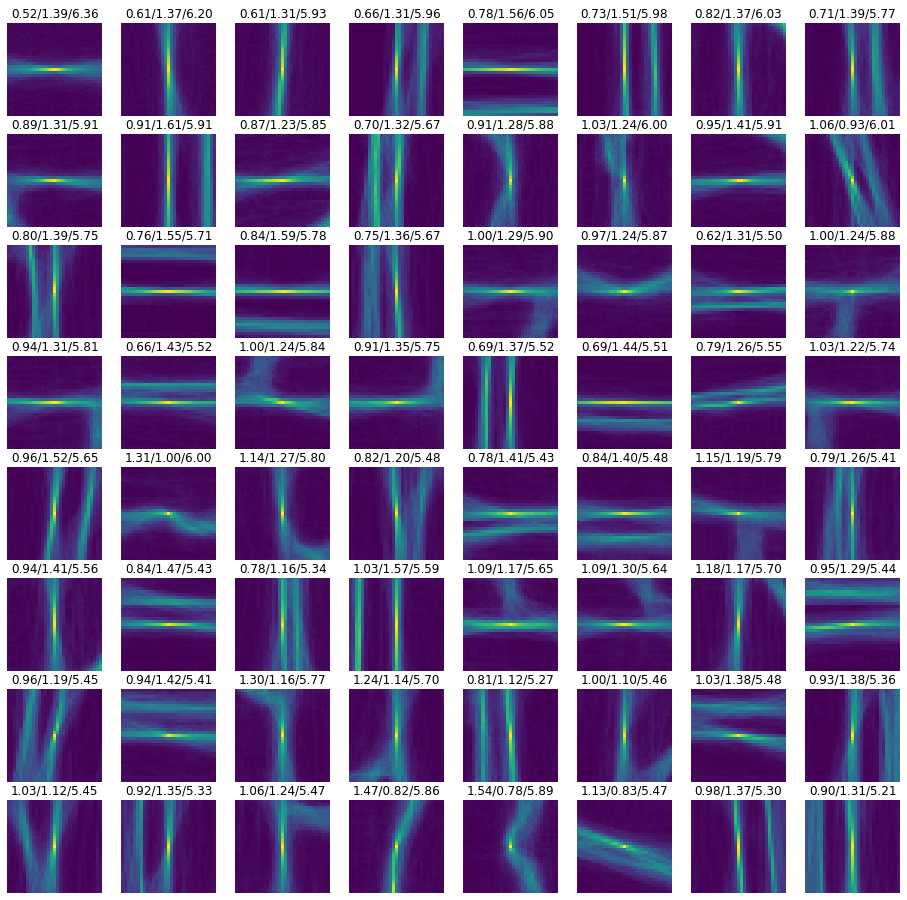

In [132]:
plot_order = np.flip(np.argsort(r_means2-c_means2))
n2plot = 64;
npx=8;npy=8;
plt.figure(figsize=(16,16));
for fi, ff in enumerate(plot_order[0:n2plot]):
    plt.subplot(npx,npy,fi+1)
    plt.pcolormesh(feature_ims[:,:,ff].T)
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.title('%.2f/%.2f/%.2f'%(c_means2[ff], l_means2[ff], r_means2[ff]))

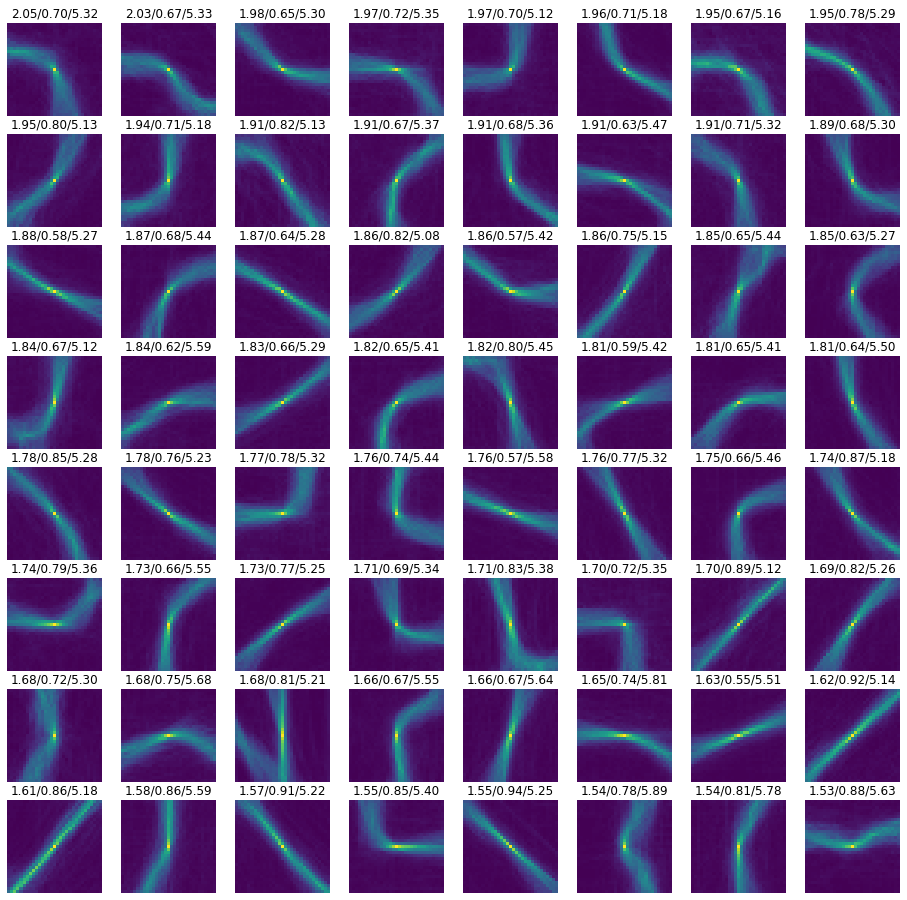

In [125]:
plot_order = np.flip(np.argsort(c_means2))
n2plot = 64;
npx=8;npy=8;
plt.figure(figsize=(16,16));
for fi, ff in enumerate(plot_order[0:n2plot]):
    plt.subplot(npx,npy,fi+1)
    plt.pcolormesh(feature_ims[:,:,ff].T)
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.title('%.2f/%.2f/%.2f'%(c_means2[ff], l_means2[ff], r_means2[ff]))

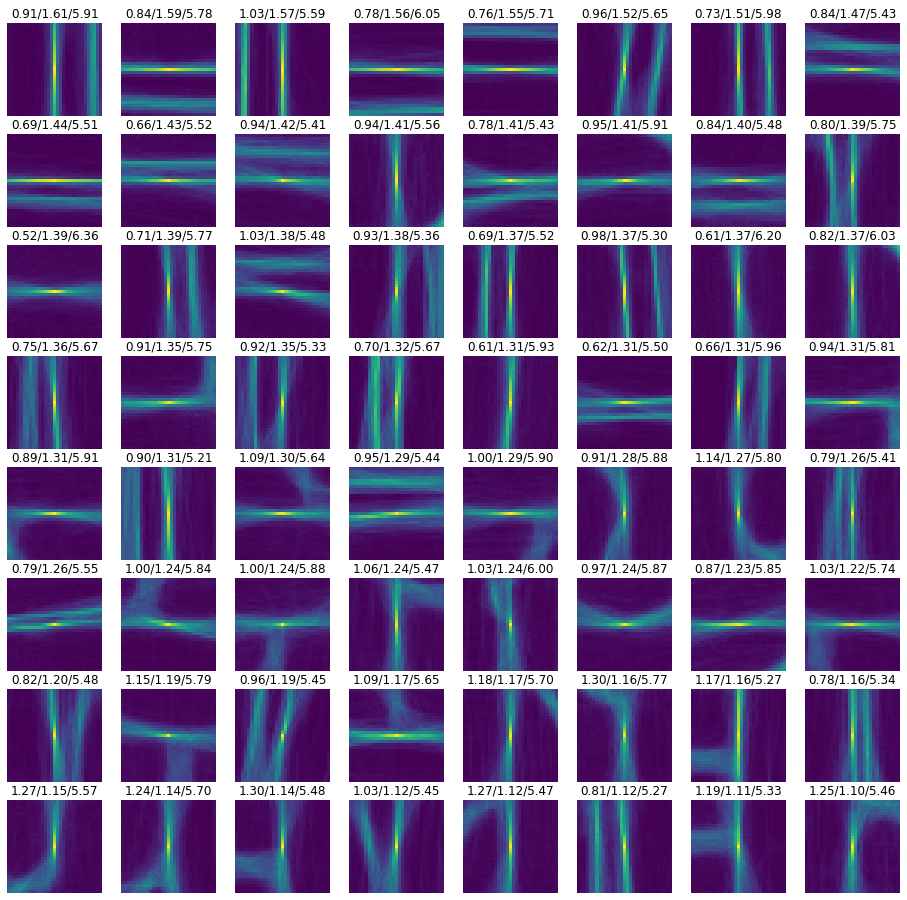

In [126]:
plot_order = np.flip(np.argsort(l_means2))
n2plot = 64;
npx=8;npy=8;
plt.figure(figsize=(16,16));
for fi, ff in enumerate(plot_order[0:n2plot]):
    plt.subplot(npx,npy,fi+1)
    plt.pcolormesh(feature_ims[:,:,ff].T)
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.title('%.2f/%.2f/%.2f'%(c_means2[ff], l_means2[ff], r_means2[ff]))

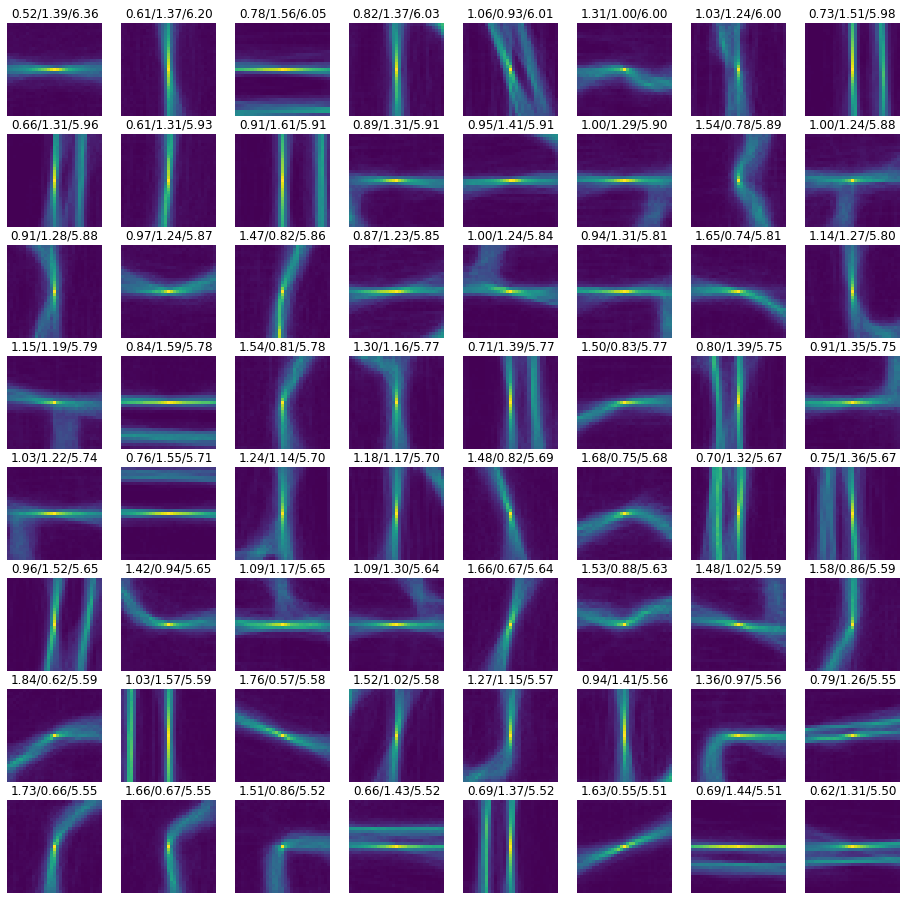

In [128]:
plot_order = np.flip(np.argsort(r_means2))
n2plot = 64;
npx=8;npy=8;
plt.figure(figsize=(16,16));
for fi, ff in enumerate(plot_order[0:n2plot]):
    plt.subplot(npx,npy,fi+1)
    plt.pcolormesh(feature_ims[:,:,ff].T)
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.title('%.2f/%.2f/%.2f'%(c_means2[ff], l_means2[ff], r_means2[ff]))

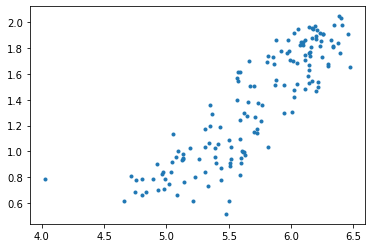

In [129]:
plt.figure();
plt.plot(c_means1, c_means2,'.')


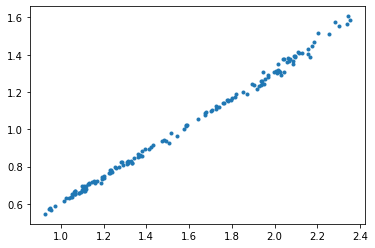

In [130]:
plt.figure();
plt.plot(l_means1, l_means2,'.')


Text(0.5, 0.98, 'feature 0')

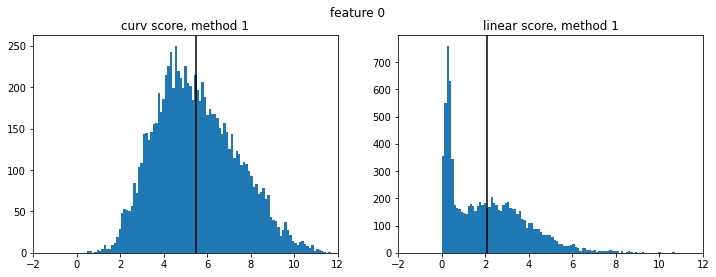

In [28]:
ff = 0;

lims = [-2,12]

plt.figure(figsize=(12,4));
plt.subplot(1,2,1)
vals = stats['curv_score_method1'][:,:,ff].ravel()
plt.hist(vals, 100);
plt.title('curv score, method 1')
plt.xlim(lims)
plt.axvline(np.mean(vals), color='k')

plt.subplot(1,2,2)
vals = stats['lin_score_method1'][:,:,ff].ravel()
plt.hist(vals, 100);
plt.title('linear score, method 1')
plt.xlim(lims)
plt.axvline(np.mean(vals), color='k')

plt.suptitle('feature %d'%ff)

Text(0.5, 0.98, 'feature 0')

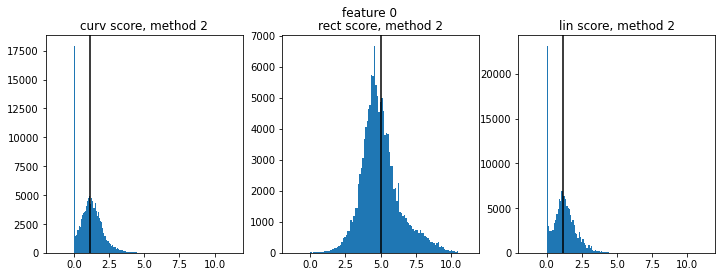

In [41]:
ff = 0;

lims = [-2, 12]

vals = stats['curv_score_method2'][:,:,ff].ravel()
plt.figure(figsize=(12,4));
plt.subplot(1,3,1)
plt.hist(vals, 100);
plt.title('curv score, method 2')
plt.xlim(lims)
plt.axvline(np.mean(vals), color='k')


plt.subplot(1,3,2)
vals = stats['rect_score_method2'][:,:,ff].ravel()
plt.hist(vals, 100);
plt.title('rect score, method 2')
plt.xlim(lims)
plt.axvline(np.mean(vals), color='k')

plt.subplot(1,3,3)
vals = stats['lin_score_method2'][:,:,ff].ravel()
plt.hist(vals, 100);
plt.title('lin score, method 2')
plt.xlim(lims)
plt.axvline(np.mean(vals), color='k')

plt.suptitle('feature %d'%ff)

Text(0.5, 0.98, 'feature 0')

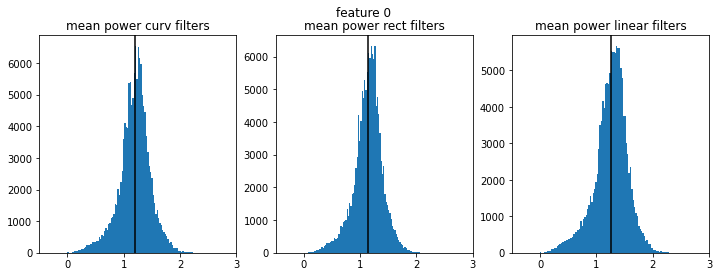

In [42]:
ff = 0;

lims = [-0.5, 3]

plt.figure(figsize=(12,4));
plt.subplot(1,3,1)
vals = stats['mean_curv'][:,:,ff].ravel()
plt.hist(vals, 100);
plt.title('mean power curv filters')
plt.xlim(lims)
plt.axvline(np.mean(vals), color='k')


plt.subplot(1,3,2)
vals = stats['mean_rect'][:,:,ff].ravel()
plt.hist(vals, 100);
plt.title('mean power rect filters')
plt.xlim(lims)
plt.axvline(np.mean(vals), color='k')

plt.subplot(1,3,3)
vals = stats['mean_lin'][:,:,ff].ravel()
plt.hist(vals, 100);
plt.title('mean power linear filters')
plt.xlim(lims)
plt.axvline(np.mean(vals), color='k')

plt.suptitle('feature %d'%ff)

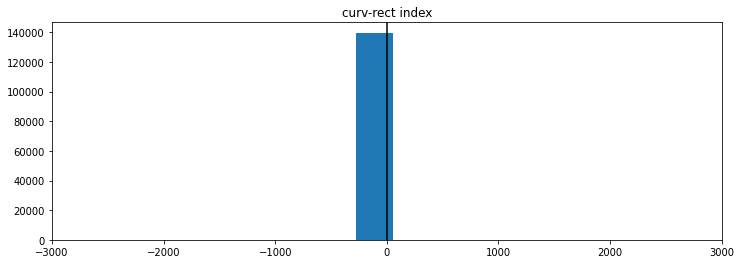

In [56]:
ff = 0;

lims = [-3000,3000]

plt.figure(figsize=(12,4));
vals = stats['curv_rect_index'][:,:,ff].ravel()
plt.hist(vals, 100);
plt.title('curv-rect index')
plt.xlim(lims)
plt.axvline(np.mean(vals), color='k')


/home/mmhender/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


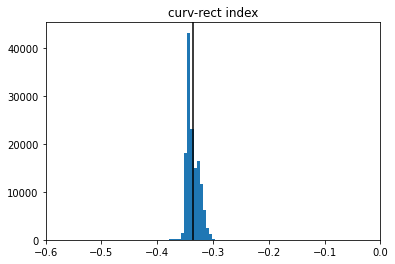

In [72]:
ff = 0;

lims = [-0.6, 0]

plt.figure(figsize=(6,4));

curv = stats['mean_curv'][:,:,ff]
rect = stats['mean_rect'][:,:,ff]
lin = stats['mean_lin'][:,:,ff]
curv_rect_index = (curv-rect-lin)/(curv+rect+lin)

vals = curv_rect_index.ravel()
plt.hist(vals, 100);
plt.title('curv-rect index')
plt.xlim(lims)
plt.axvline(np.nanmean(vals), color='k')


/home/mmhender/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/home/mmhender/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/home/mmhender/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


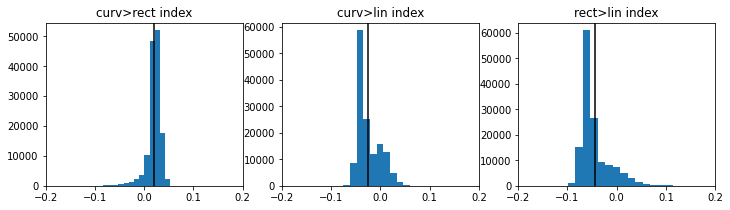

In [77]:
ff = 0;

lims = [-0.2, 0.2]


curv = stats['mean_curv'][:,:,ff]
rect = stats['mean_rect'][:,:,ff]
lin = stats['mean_lin'][:,:,ff]

plt.figure(figsize=(12,3));

plt.subplot(1,3,1)

index = (curv-rect)/(curv+rect)

vals = index.ravel()
plt.hist(vals, 100);
plt.title('curv>rect index')
plt.xlim(lims)
plt.axvline(np.nanmean(vals), color='k')

plt.subplot(1,3,2)

index = (curv-lin)/(curv+lin)

vals = index.ravel()
plt.hist(vals, 100);
plt.title('curv>lin index')
plt.xlim(lims)
plt.axvline(np.nanmean(vals), color='k')

plt.subplot(1,3,3)

index = (rect-lin)/(rect+lin)

vals = index.ravel()
plt.hist(vals, 100);
plt.title('rect>lin index')
plt.xlim(lims)
plt.axvline(np.nanmean(vals), color='k')


Text(0.5, 0.98, 'feature 0')

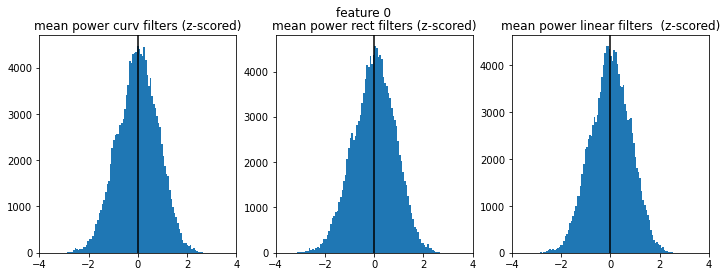

In [43]:
ff = 0;

lims = [-4,4]

plt.figure(figsize=(12,4));
plt.subplot(1,3,1)
vals= stats['mean_curv_z'][:,:,ff].ravel()
plt.hist(vals, 100);
plt.title('mean power curv filters (z-scored)')
plt.xlim(lims)
plt.axvline(np.mean(vals), color='k')

plt.subplot(1,3,2)
vals = stats['mean_rect_z'][:,:,ff].ravel()
plt.hist(vals, 100);
plt.title('mean power rect filters (z-scored)')
plt.xlim(lims)
plt.axvline(np.mean(vals), color='k')

plt.subplot(1,3,3)
vals = stats['mean_lin_z'][:,:,ff].ravel()
plt.hist(vals, 100);
plt.title('mean power linear filters  (z-scored)')
plt.xlim(lims)
plt.axvline(np.mean(vals), color='k')

plt.suptitle('feature %d'%ff)

In [31]:
stats['lin_score_method2'].shape

(96, 1456, 150)

In [104]:
from analyze_features import analyze_im_curvature

freq_values_cyc_per_pix = [0.5, 0.25, 0.125, 0.0625, 0.03125]
bend_values = [0, 0.04, 0.08, 0.16, 0.32, 0.64]
orient_values = np.linspace(0,np.pi*2, 9)[0:8]

cropped_size = 240
freq_values_cyc_per_image = np.array(freq_values_cyc_per_pix)*cropped_size

bank = analyze_im_curvature.bent_gabor_feature_bank(freq_values = freq_values_cyc_per_image, \
                                       bend_values = bend_values, \
                                       orient_values = orient_values, \
                                       image_size=cropped_size, \
                                       device = 'cpu:0')

initialized feature bank, device is: cpu:0
freq values
[120.   60.   30.   15.    7.5]
scale values
[ 2.  4.  6.  8. 10.]
bend values
[0, 0.04, 0.08, 0.16, 0.32, 0.64]
orient values
[0.         0.78539816 1.57079633 2.35619449 3.14159265 3.92699082
 4.71238898 5.49778714]


164
[0.19634954 0.04       3.14159265 1.        ]
164
[0.19634954 0.04       3.14159265 0.        ]
32
[0.19634954 0.         0.         0.        ]


Text(0.5, 0.98, 'feature 2')

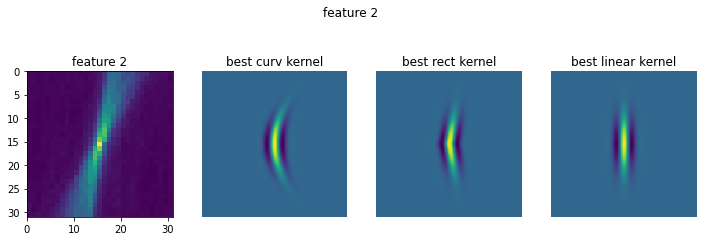

In [113]:


ff = 2

plt.figure(figsize=(12,4));

plt.subplot(1,4,1)
plt.pcolormesh(feature_ims[:,:,ff].T)
plt.axis('square')
plt.gca().invert_yaxis()
# plt.axis('off')

plt.title('feature %d'%ff)

plt.subplot(1,4,2)
best_k = stats['best_curv_kernel'][:,:,ff]
un, counts = np.unique(best_k, return_counts=True)
best_kernel_ind = int(un[np.argmax(counts)])
print(best_kernel_ind)
print(bank.curv_kernel_pars[best_kernel_ind,:])
plt.pcolormesh(bank.kernels['curv_space'][best_kernel_ind])
plt.axis('square')
plt.axis('off')
plt.title('best curv kernel')

plt.subplot(1,4,3)
best_k = stats['best_rect_kernel'][:,:,ff]
un, counts = np.unique(best_k, return_counts=True)
best_kernel_ind = int(un[np.argmax(counts)])
print(best_kernel_ind)
print(bank.rect_kernel_pars[best_kernel_ind,:])
plt.pcolormesh(bank.kernels['rect_space'][best_kernel_ind])
plt.axis('square')
plt.axis('off')
plt.title('best rect kernel')

plt.subplot(1,4,4)
best_k = stats['best_lin_kernel'][:,:,ff]
un, counts = np.unique(best_k, return_counts=True)
best_kernel_ind = int(un[np.argmax(counts)])
print(best_kernel_ind)
print(bank.lin_kernel_pars[best_kernel_ind,:])
plt.pcolormesh(bank.kernels['lin_space'][best_kernel_ind])
plt.axis('square')
plt.axis('off')
plt.title('best linear kernel')

plt.suptitle('feature %d'%ff)

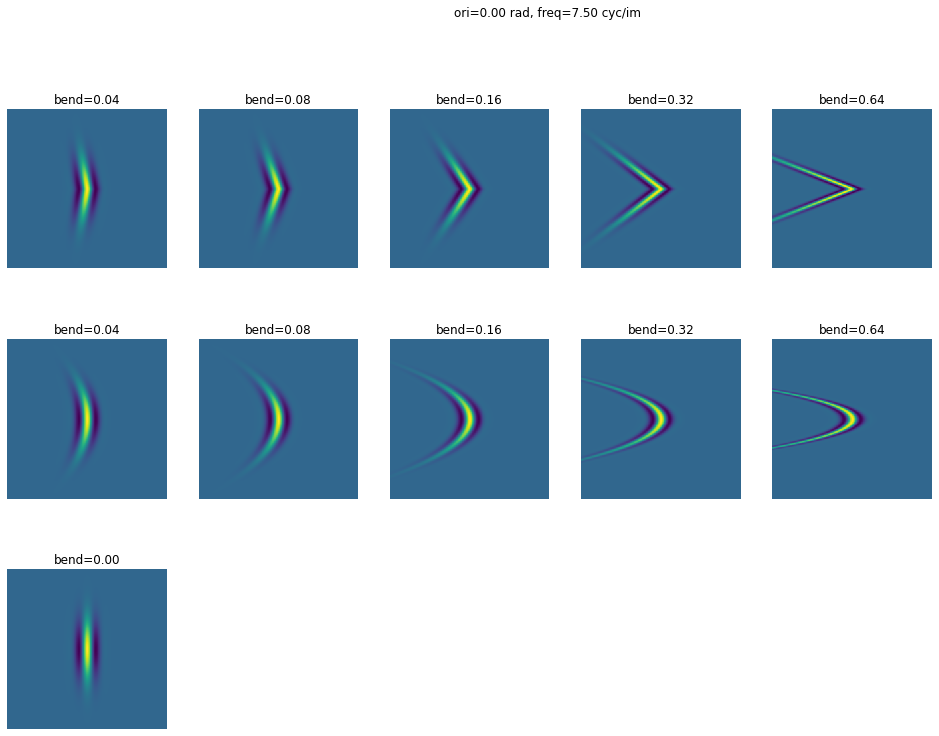

In [95]:
bank.plot_kernel_bends(scale_ind=4)